In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

In [2]:
train = pd.read_csv('/content/healthy_lifestyle_city_2021.csv')

In [3]:
train

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [4]:
train['Cost of a bottle of water(City)'] = train['Cost of a bottle of water(City)'].replace(to_replace ='£', value = '', regex = True)

In [5]:
train['Obesity levels(Country)'] = train['Obesity levels(Country)'].replace(to_replace ='%', value = '', regex = True)

In [6]:
train['Cost of a monthly gym membership(City)'] = train['Cost of a monthly gym membership(City)'].replace(to_replace ='£', value = '', regex = True)

In [7]:
train=train.drop(['Rank'],axis=1)

In [8]:
train = train.replace('-', np.nan)

In [9]:
train['Sunshine hours(City)']=train['Sunshine hours(City)'].map(float)

In [10]:
train['Cost of a bottle of water(City)']=train['Cost of a bottle of water(City)'].map(float)
train['Obesity levels(Country)']=train['Obesity levels(Country)'].map(float)
train['Pollution(Index score) (City)']=train['Pollution(Index score) (City)'].map(float)
train['Annual avg. hours worked']=train['Annual avg. hours worked'].map(float)
train['Cost of a monthly gym membership(City)']=train['Cost of a monthly gym membership(City)'].map(float)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Sunshine hours(City)                    43 non-null     float64
 2   Cost of a bottle of water(City)         44 non-null     float64
 3   Obesity levels(Country)                 44 non-null     float64
 4   Life expectancy(years) (Country)        44 non-null     float64
 5   Pollution(Index score) (City)           43 non-null     float64
 6   Annual avg. hours worked                33 non-null     float64
 7   Happiness levels(Country)               44 non-null     float64
 8   Outdoor activities(City)                44 non-null     int64  
 9   Number of take out places(City)         44 non-null     int64  
 10  Cost of a monthly gym membership(City)  44 non-null     float64


In [12]:
train.describe().style.background_gradient(cmap = "Greens")

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,43.000000,44.000000,44.000000,44.000000,43.000000,33.000000,44.000000,44.000000,44.000000,44.000000
mean,2245.860465,1.173409,21.925000,78.175000,51.122326,1672.909091,6.435000,213.977273,1443.113636,40.420000
std,567.403719,0.718642,10.195670,5.304370,21.856190,179.626933,0.991202,127.190297,1388.803270,15.006457
min,1405.000000,0.150000,3.900000,56.300000,13.080000,1380.000000,3.570000,23.000000,250.000000,16.070000
25%,1798.500000,0.570000,19.500000,75.400000,34.355000,1540.000000,5.870000,125.250000,548.000000,31.310000
50%,2066.000000,1.195000,22.300000,80.400000,52.640000,1686.000000,6.900000,189.500000,998.000000,37.330000
75%,2629.000000,1.600000,29.000000,81.800000,66.630000,1779.000000,7.175000,288.250000,1674.250000,47.210000
max,3542.000000,3.200000,36.200000,83.200000,91.740000,2137.000000,7.800000,585.000000,6417.000000,73.110000


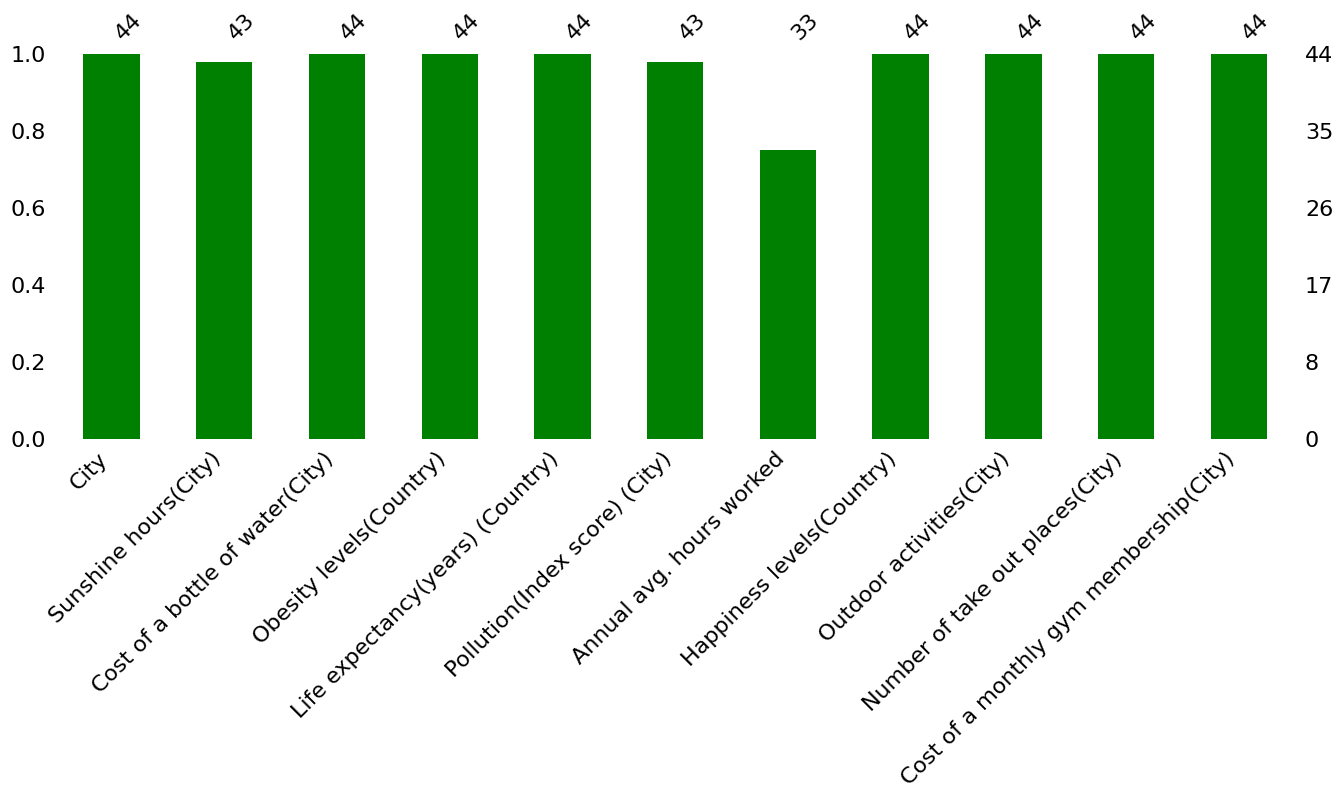

In [13]:
msno.bar(train, figsize = (16,5),color = "Green")
plt.show()

In [14]:
train.loc[train['City']=='Geneva', 'Sunshine hours(City)'] = 169*12
train.loc[train['City']=='Fukuoka', 'Pollution(Index score) (City)'] = 33
train.loc[train['City']=='Beijing', 'Annual avg. hours worked'] = 2288
train.loc[train['City']=='Mumbai', 'Annual avg. hours worked'] = 2117
train.loc[train['City']=='Bangkok', 'Annual avg. hours worked'] = 2185
train.loc[train['City']=='Buenos Aires', 'Annual avg. hours worked'] = 1691
train.loc[train['City']=='Jakarta', 'Annual avg. hours worked'] = 2024
train.loc[train['City']=='Cairo', 'Annual avg. hours worked'] = 1952
train.loc[train['City']=='Taipei', 'Annual avg. hours worked'] = 1990
train.loc[train['City']=='Hong Kong', 'Annual avg. hours worked'] = 2190
train.loc[train['City']=='Shanghai', 'Annual avg. hours worked'] = 2174
train.loc[train['City']=='Sao Paulo', 'Annual avg. hours worked'] = 1709
train.loc[train['City']=='Johannesburg', 'Annual avg. hours worked'] = 2011


In [15]:
train.columns

Index(['City', 'Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [16]:
numeric_features=['Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)']

In [17]:
fig = make_subplots(rows=len(numeric_features), cols=3)
i=1
for feature in numeric_features:
  fig.add_trace(go.Histogram(x=train[feature], name=feature), row=i, col=1)
  fig.add_trace(go.Box(x=train[feature], name=feature), row=i, col=2)
  fig.add_trace(go.Violin(x=train[feature], name=feature), row=i, col=3)
  i+=1
fig.update_layout(height=2400, width=1800, title_text='<b>Continuos distributions', title_x=0.5)
fig.show()


In [18]:
for feature in numeric_features:
  top5 = train.nlargest(5,feature).sort_values(by=feature)
  fig_bar = px.bar(x = top5['City'], y = top5[feature])
  fig_bar.update_layout(width = 1000, height = 500, title_text=f"TOP 5 cities by {feature}")
  fig_bar.update_xaxes(title = 'City')
  fig_bar.update_yaxes(title = f'{feature}')
  fig_bar.show()


In [27]:
for feature in numeric_features:
  fig = px.scatter(train, x='Happiness levels(Country)',y=feature)
  fig.update_layout(title=f"Scatter plot Happiness score with {feature}")
  fig.show()

In [19]:
!pip install geopandas

In [20]:
from geopandas.tools import geocode

In [21]:
location = geocode(train['City'], provider="nominatim" , user_agent = 'my_request')

In [22]:
point = location.geometry

In [23]:
train['logitude']=list(point.x)
train['lantitude']=list(point.y)

In [24]:
train.head()

,City,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),logitude,lantitude
0,Amsterdam,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90,4.892453,52.373080
1,Sydney,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66,151.208285,-33.869844
2,Vienna,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74,16.372504,48.208354
3,Stockholm,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31,18.071093,59.325117
4,Copenhagen,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53,12.570072,55.686724


In [25]:
for feature in numeric_features:
  fig = px.scatter_mapbox(train, lat=train['lantitude'], lon=train['logitude'], size=train[feature], color_continuous_scale=px.colors.sequential.Rainbow,
                        size_max=50,  center=dict(lat=train['lantitude'].mean() + 1, lon=train['logitude'].mean() - 1.5),
                         zoom=1, mapbox_style="stamen-terrain",  title=f'Visualization of the parameter {feature} on the map',color=feature)
  fig.update_layout(title_x=0.5, height=600)
  fig.show()

In [29]:
# Calculate correlation for numeric columns only
correlation = train.select_dtypes(include=np.number).corr()

# Print correlation with 'Happiness levels(Country)'
print(correlation['Happiness levels(Country)'].sort_values(ascending = False),'\n')

Happiness levels(Country)                 1.000000
Cost of a bottle of water(City)           0.813159
Life expectancy(years) (Country)          0.724587
Obesity levels(Country)                   0.446399
lantitude                                 0.314969
Cost of a monthly gym membership(City)    0.297425
Number of take out places(City)           0.033116
Outdoor activities(City)                 -0.137612
Sunshine hours(City)                     -0.338654
logitude                                 -0.422981
Annual avg. hours worked                 -0.725189
Pollution(Index score) (City)            -0.745871
Name: Happiness levels(Country), dtype: float64 



Index(['Happiness levels(Country)', 'Cost of a bottle of water(City)',
       'Life expectancy(years) (Country)', 'Obesity levels(Country)',
       'lantitude', 'Cost of a monthly gym membership(City)',
       'Number of take out places(City)', 'Outdoor activities(City)',
       'Sunshine hours(City)', 'logitude', 'Annual avg. hours worked',
       'Pollution(Index score) (City)'],
      dtype='object')


<Axes: >

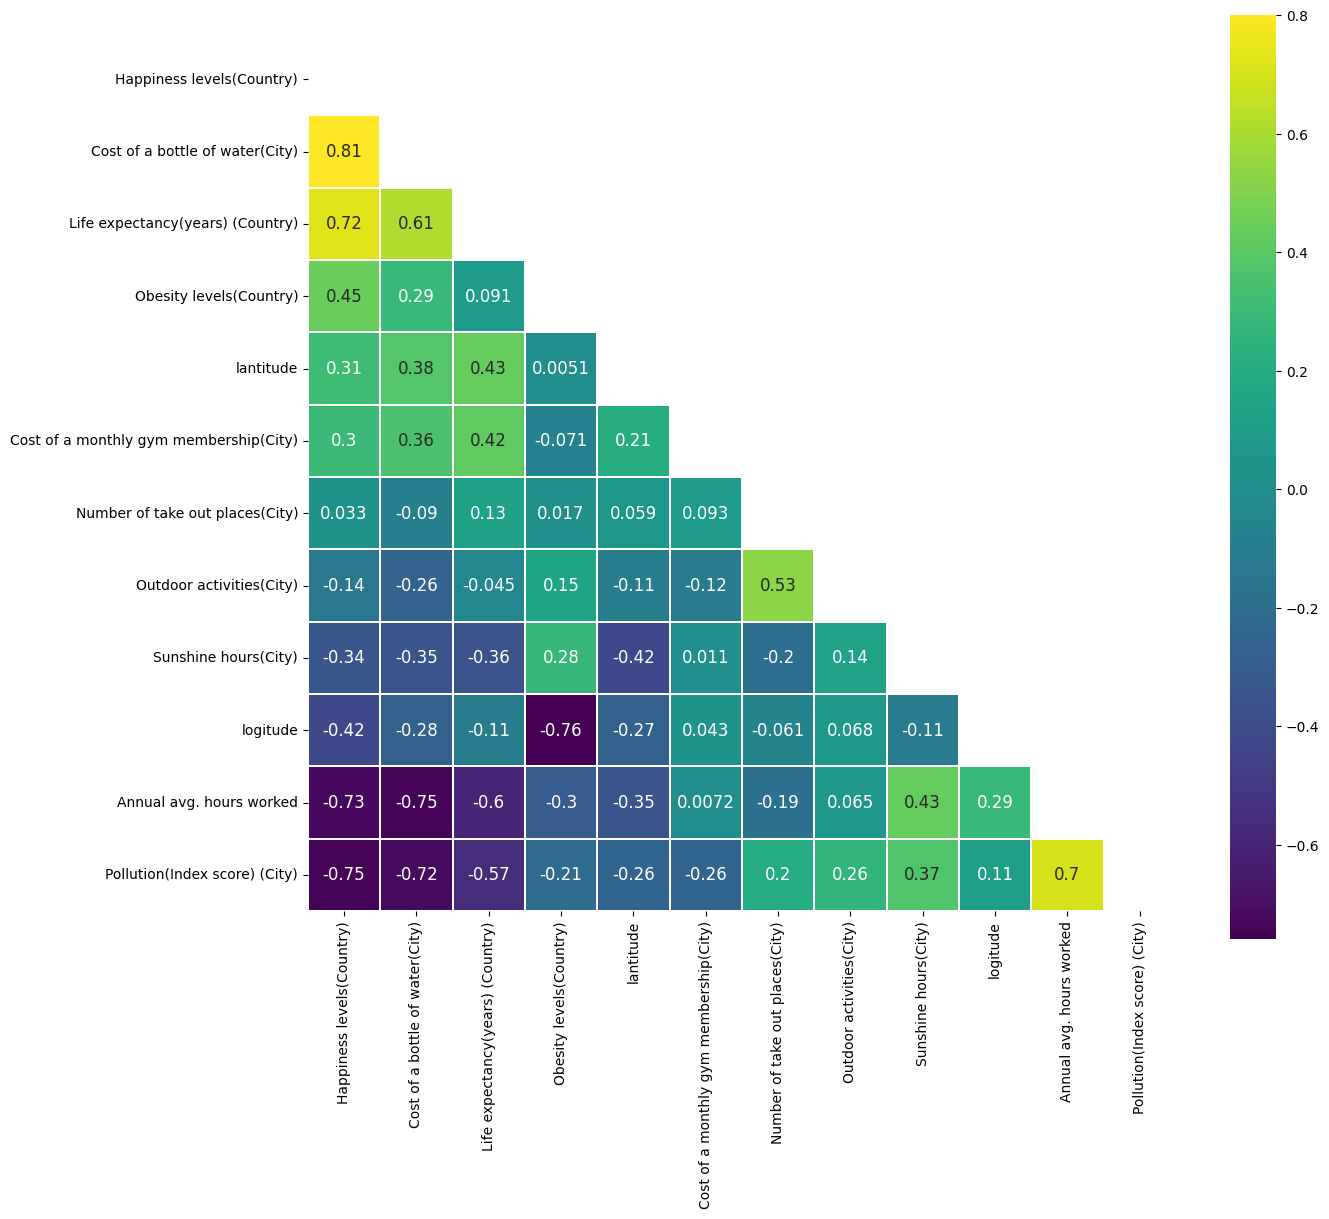

In [31]:
k= 18
cols = correlation.nlargest(k,'Happiness levels(Country)')['Happiness levels(Country)'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(cm))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)